# Customer Segmentation

## Libraries Importing

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

#### A case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customers groups.

# Data Gathering 

In [2]:
df=pd.read_csv('Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## EDA :- Exploratory Data Analysis

In [3]:
df.shape #Here we can observe that we have the 8950 records and the 18 columns

(8950, 18)

In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
#checking for null values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#Checking percentage of null values
df.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

## Feature Engineering

<!-- Here we can observe the Customer ID didnt play any important role in the given dataset, It is not important at all so we drop it. -->

In [10]:
df.drop('CUST_ID',axis=1,inplace=True)

#### Null Value Imputation

In [12]:
knn_imp=KNNImputer()
array=knn_imp.fit_transform(df)
df=pd.DataFrame(array,columns=df.columns)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [21]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.179679,1733.143852,852.716172,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.701915,2895.063757,2347.654983,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,166.310858,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,300.956126,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.414788,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531309,0.322802,0.400530,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.096015,0.065008,0.137774,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356985,0.603264,0.095094,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319740,0.567292,0.050073,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256523,0.384084,0.132714,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.304003,0.453238,0.141173,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119866,0.103464,0.005080,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295074,0.243537,-0.027277,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060819,0.085551,0.030898,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132601,0.183192,0.102752,-0.249773,-0.133372


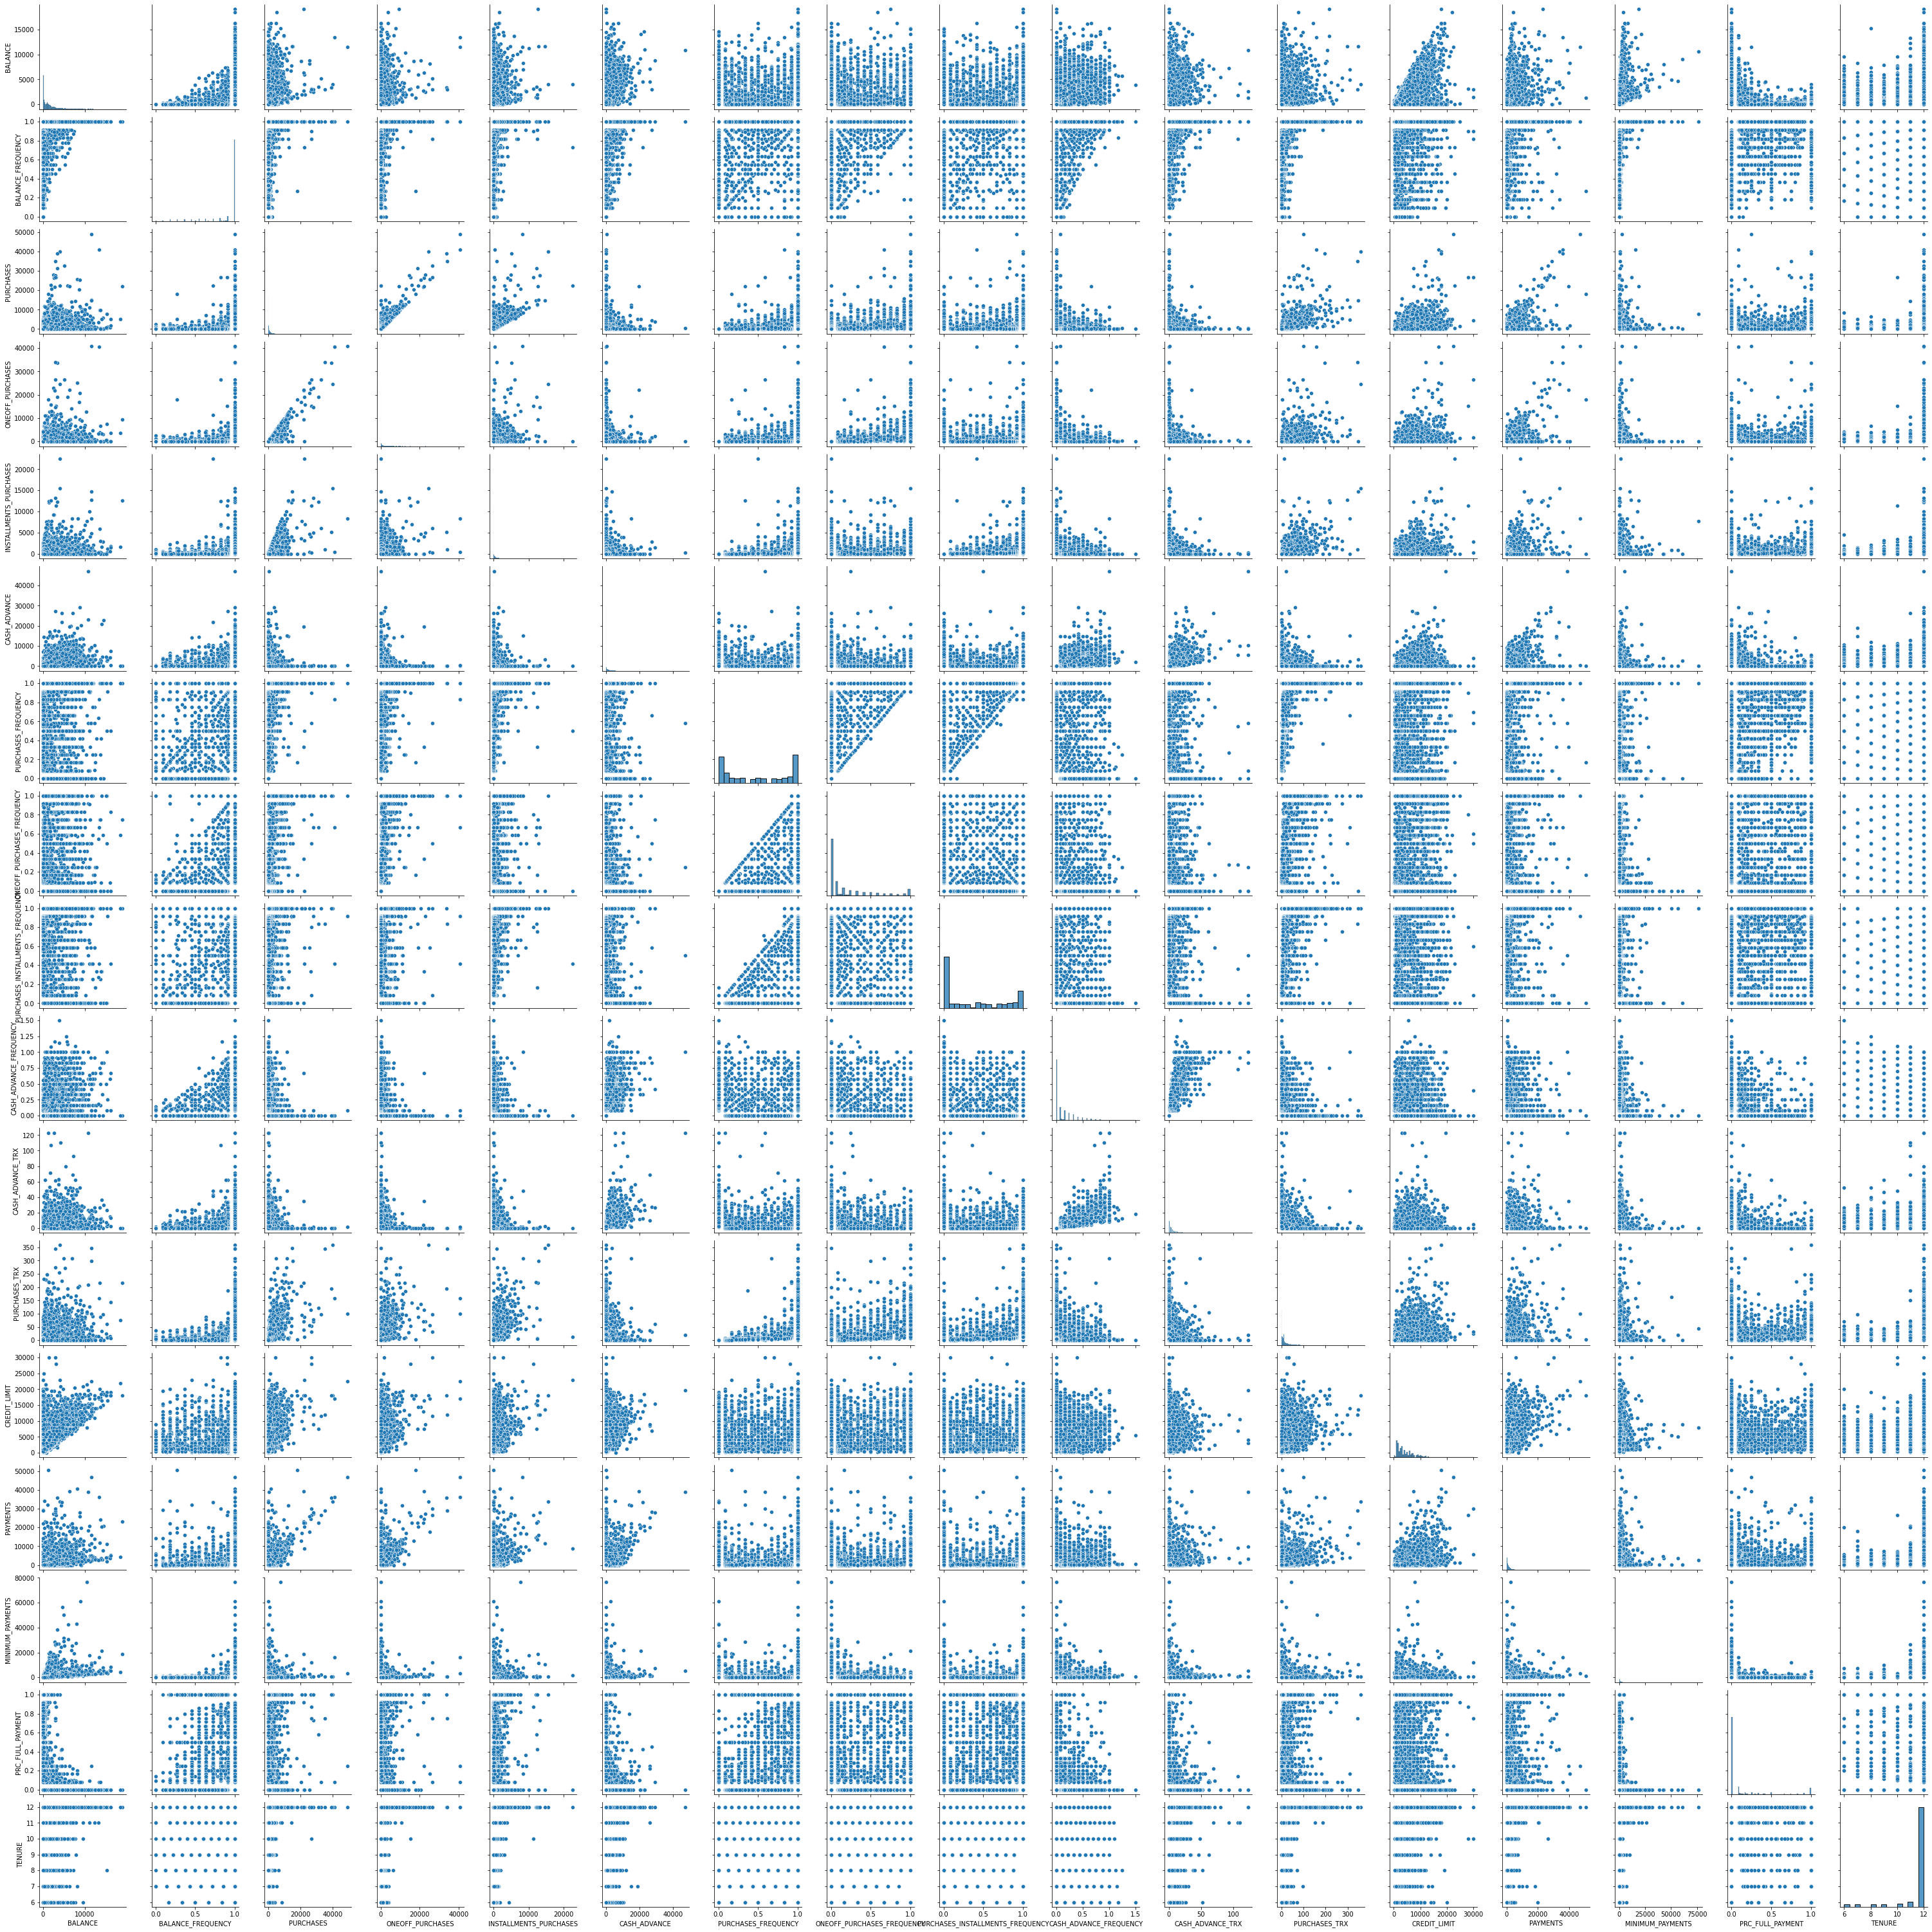

In [15]:
sns.pairplot(df)

<AxesSubplot:>

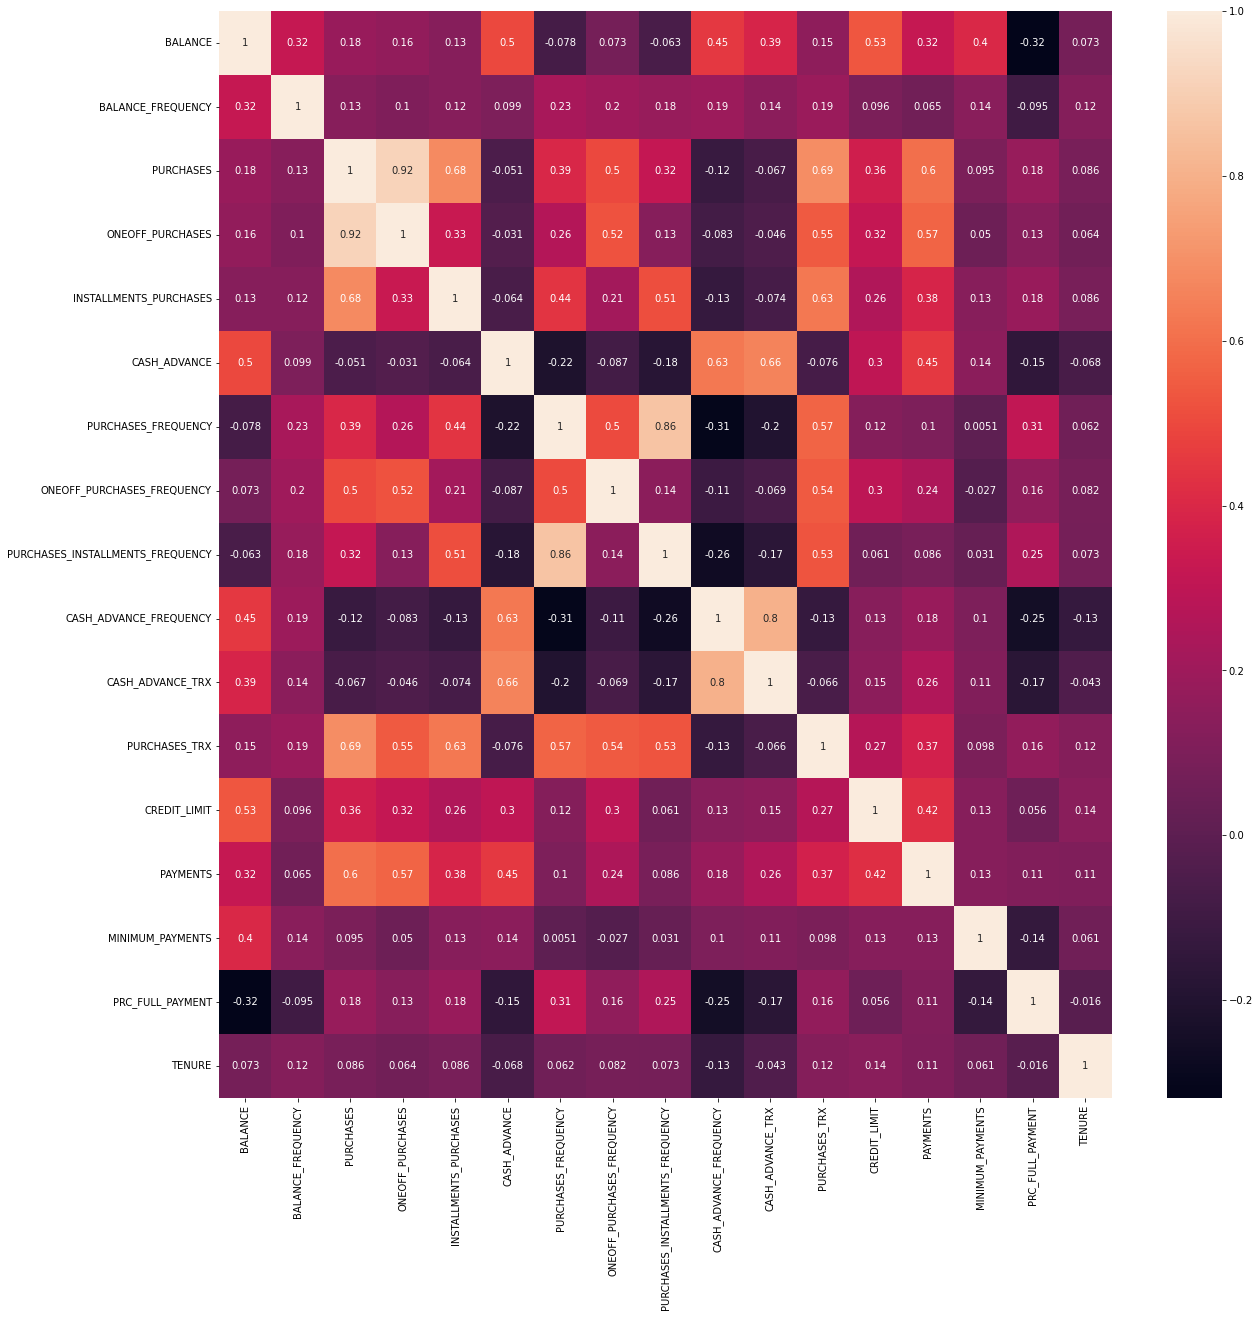

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

BALANCE === 2.393386042571806
BALANCE_FREQUENCY === -2.0232655185149078
PURCHASES === 8.144269064554651
ONEOFF_PURCHASES === 10.045082884700278
INSTALLMENTS_PURCHASES === 7.299119908745641
CASH_ADVANCE === 5.166609074074723
PURCHASES_FREQUENCY === 0.06016423585803591
ONEOFF_PURCHASES_FREQUENCY === 1.5356127835248519
PURCHASES_INSTALLMENTS_FREQUENCY === 0.5092011649999882
CASH_ADVANCE_FREQUENCY === 1.828686266477852
CASH_ADVANCE_TRX === 5.721298203192298
PURCHASES_TRX === 4.630655265932403
CREDIT_LIMIT === 1.5226265002142063
PAYMENTS === 5.907619794397562
MINIMUM_PAYMENTS === 13.628739919044367
PRC_FULL_PAYMENT === 1.942819940971858
TENURE === -2.9430172876199134


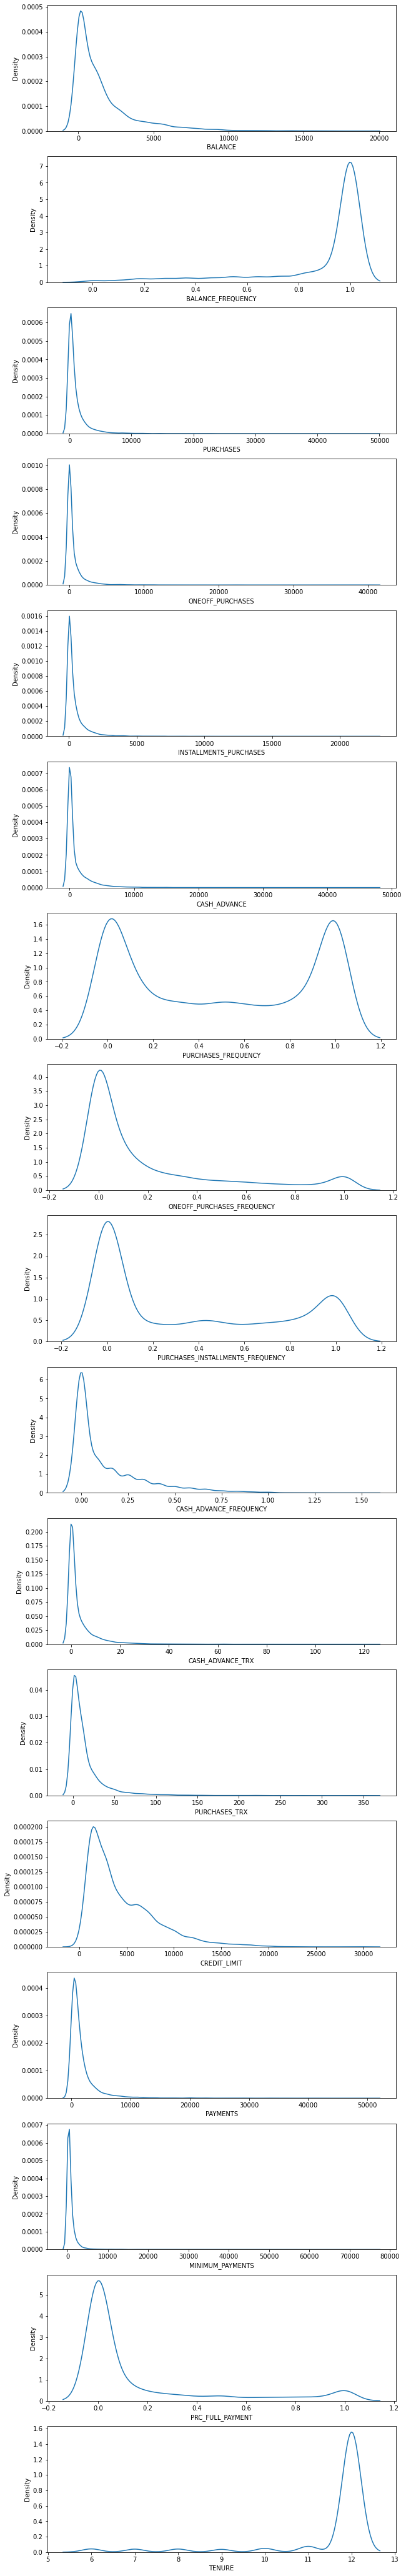

In [34]:
plt.figure(figsize=(10,75))
k=1
for i in df.columns:
    plt.subplot(len(df.columns),1,k)
    print(i,"===",df[i].skew())
    sns.kdeplot(df[i])
    k+=1

<AxesSubplot:>

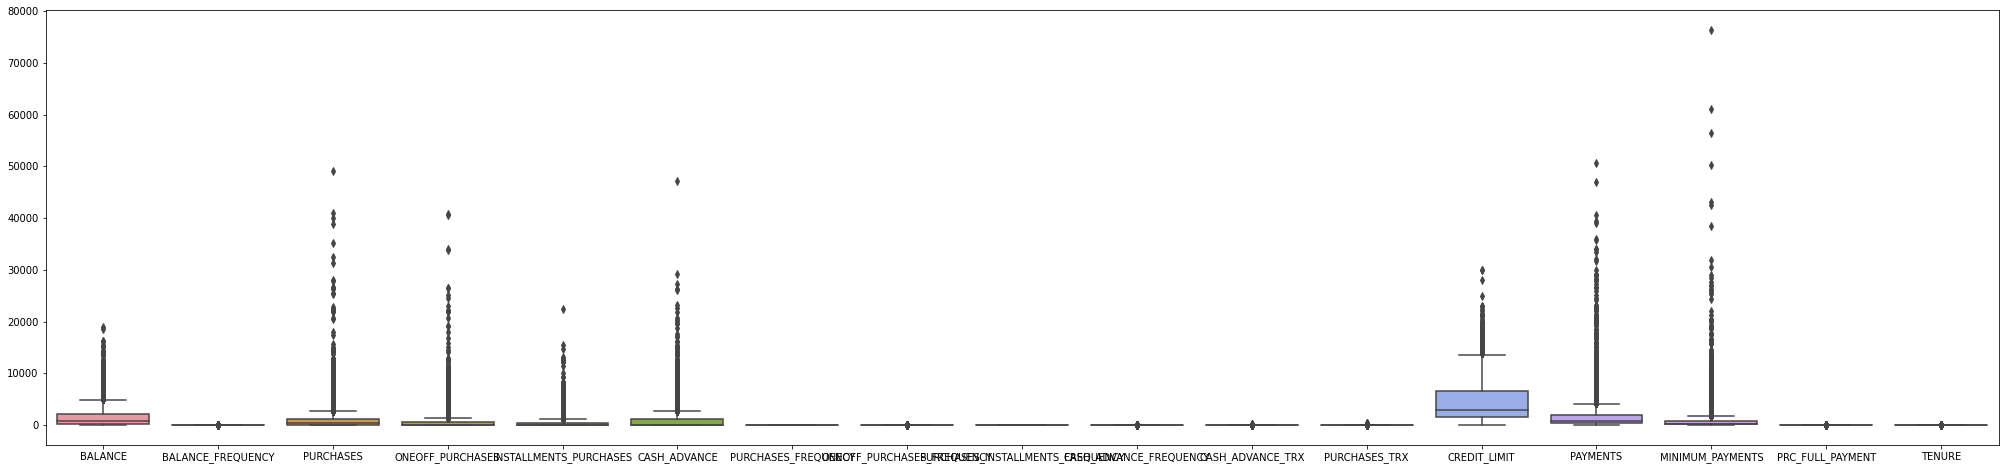

In [37]:
plt.figure(figsize=(35,8))
sns.boxplot(df)

<AxesSubplot:>

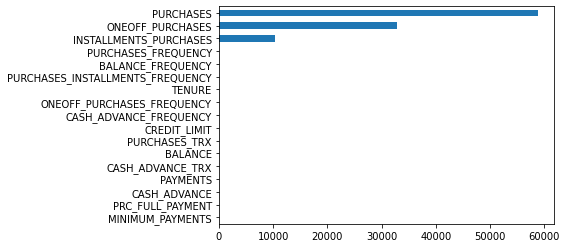

In [38]:
vif=[]
for i in range(len(df.columns)):
    v=variance_inflation_factor(df.to_numpy(),i)
    vif.append(v)
s1=pd.Series(vif,index=df.columns)
s1.sort_values().plot(kind='barh')

In [39]:
kmean=KMeans()
kmean.fit(df)

KMeans()

In [44]:
y_pred=kmean.fit_predict(df)
y_pred

array([1, 5, 6, ..., 1, 1, 1])

In [50]:
wcss_list=[]
for i in range(1,18):
    kmean_model=KMeans(n_clusters=i)
    kmean_model.fit(df)
    wcss_list.append(np.round(kmean_model.inertia_,2))

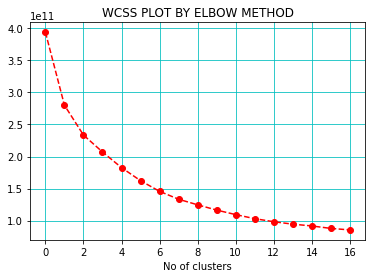

In [54]:
plt.plot(wcss_list,'ro--')
plt.title("WCSS PLOT BY ELBOW METHOD")
plt.xlabel("No of clusters")
plt.grid(color='c')

In [55]:
kmean_model=KMeans(n_clusters=4)
kmean_model.fit(df)

KMeans(n_clusters=4)

In [61]:
df['TARGET']=kmean_model.fit_predict(df)

In [62]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TARGET
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0


In [64]:
df['TARGET'].value_counts()

0    6476
3    2285
1     129
2      60
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

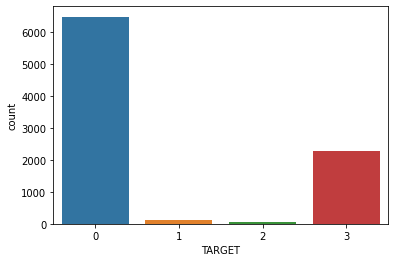

In [156]:
sns.countplot(x=df['TARGET'])

## Train Test Split

In [86]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
# Data is not normally distributed so we select the MinMaxScalar. 

In [88]:
norm_scal=MinMaxScaler()
train_array=norm_scal.fit_transform(x_train)
x_train_scale=pd.DataFrame(train_array,columns=x.columns)
test_array=norm_scal.transform(x_test)
x_test_scale=pd.DataFrame(test_array,columns=x.columns)

In [89]:
acc_list={'Train':[],'Test':[]}
models=[]

### Logistic Regression

In [90]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [91]:
display("Model Evaluation On Training Data")
y_pred_train=lr_model.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.8798882681564246
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5181
           1       0.29      0.41      0.34       103
           2       0.45      0.69      0.54        48
           3       0.81      0.79      0.80      1828

    accuracy                           0.88      7160
   macro avg       0.62      0.70      0.65      7160
weighted avg       0.88      0.88      0.88      7160

********************************************************************************
Confusion Matrix:- 
 [[4778   80   38  285]
 [  13   42    1   47]
 [  15    0   33    0]
 [ 354   25    2 1447]]


In [92]:
display("Model Evaluation On Testing Data")
y_pred_test=lr_model.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.8743016759776536
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1295
           1       0.33      0.54      0.41        26
           2       0.40      0.67      0.50        12
           3       0.81      0.78      0.80       457

    accuracy                           0.87      1790
   macro avg       0.61      0.73      0.66      1790
weighted avg       0.88      0.87      0.88      1790

********************************************************************************
Confusion Matrix:- 
 [[1185   24   12   74]
 [   1   14    0   11]
 [   4    0    8    0]
 [  94    5    0  358]]


In [93]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("Logistic Regression")

In [95]:
lr_model_scale=LogisticRegression()
lr_model_scale.fit(x_train_scale,y_train)

LogisticRegression()

In [97]:
display("Model Evaluation On Training Data")
y_pred_train=lr_model_scale.predict(x_train_scale)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.9634078212290503
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5181
           1       0.98      0.49      0.65       103
           2       1.00      0.21      0.34        48
           3       0.95      0.92      0.94      1828

    accuracy                           0.96      7160
   macro avg       0.97      0.65      0.73      7160
weighted avg       0.96      0.96      0.96      7160

********************************************************************************
Confusion Matrix:- 
 [[5153    0    0   28]
 [   2   50    0   51]
 [  27    0   10   11]
 [ 142    1    0 1685]]


In [98]:
display("Model Evaluation On Testing Data")
y_pred_test=lr_model_scale.predict(x_test_scale)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9636871508379888
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1295
           1       1.00      0.62      0.76        26
           2       1.00      0.25      0.40        12
           3       0.95      0.92      0.93       457

    accuracy                           0.96      1790
   macro avg       0.98      0.70      0.77      1790
weighted avg       0.96      0.96      0.96      1790

********************************************************************************
Confusion Matrix:- 
 [[1284    0    0   11]
 [   0   16    0   10]
 [   6    0    3    3]
 [  35    0    0  422]]


In [99]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("Logistic Regression With Scaling")

## KNN :- K Nearest Neighbors

In [100]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
display("Model Evaluation On Training Data")
y_pred_train=knn_model.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.9910614525139665
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5181
           1       0.99      0.88      0.93       103
           2       1.00      0.94      0.97        48
           3       0.99      0.98      0.98      1828

    accuracy                           0.99      7160
   macro avg       0.99      0.95      0.97      7160
weighted avg       0.99      0.99      0.99      7160

********************************************************************************
Confusion Matrix:- 
 [[5167    0    0   14]
 [   0   91    0   12]
 [   1    1   45    1]
 [  35    0    0 1793]]


In [102]:
display("Model Evaluation On Testing Data")
y_pred_test=knn_model.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9815642458100559
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1295
           1       1.00      1.00      1.00        26
           2       0.92      0.92      0.92        12
           3       0.96      0.96      0.96       457

    accuracy                           0.98      1790
   macro avg       0.97      0.97      0.97      1790
weighted avg       0.98      0.98      0.98      1790

********************************************************************************
Confusion Matrix:- 
 [[1279    0    0   16]
 [   0   26    0    0]
 [   0    0   11    1]
 [  15    0    1  441]]


In [103]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("KNN")

In [108]:
knn_model_scale=KNeighborsClassifier()
knn_model_scale.fit(x_train_scale,y_train)

KNeighborsClassifier()

In [109]:
display("Model Evaluation On Training Data")
y_pred_train=knn_model_scale.predict(x_train_scale)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.9491620111731843
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5181
           1       0.97      0.59      0.73       103
           2       0.95      0.75      0.84        48
           3       0.95      0.86      0.90      1828

    accuracy                           0.95      7160
   macro avg       0.95      0.80      0.86      7160
weighted avg       0.95      0.95      0.95      7160

********************************************************************************
Confusion Matrix:- 
 [[5132    0    2   47]
 [   4   61    0   38]
 [   9    0   36    3]
 [ 259    2    0 1567]]


In [110]:
display("Model Evaluation On Testing Data")
y_pred_test=knn_model_scale.predict(x_test_scale)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9206703910614525
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1295
           1       1.00      0.42      0.59        26
           2       1.00      0.75      0.86        12
           3       0.91      0.78      0.84       457

    accuracy                           0.92      1790
   macro avg       0.96      0.73      0.81      1790
weighted avg       0.92      0.92      0.92      1790

********************************************************************************
Confusion Matrix:- 
 [[1272    0    0   23]
 [   2   11    0   13]
 [   2    0    9    1]
 [ 101    0    0  356]]


In [111]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("KNN With Scaling")

# Decision Tree

In [112]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
display("Model Evaluation On Training Data")
y_pred_train=dt_model.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)e5.
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 1.0
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5181
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00      1828

    accuracy                           1.00      7160
   macro avg       1.00      1.00      1.00      7160
weighted avg       1.00      1.00      1.00      7160

********************************************************************************
Confusion Matrix:- 
 [[5181    0    0    0]
 [   0  103    0    0]
 [   0    0   48    0]
 [   0    0    0 1828]]


In [114]:
display("Model Evaluation On Testing Data")
y_pred_test=dt_model.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9754189944134078
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1295
           1       0.91      0.77      0.83        26
           2       0.86      1.00      0.92        12
           3       0.94      0.96      0.95       457

    accuracy                           0.98      1790
   macro avg       0.92      0.93      0.92      1790
weighted avg       0.98      0.98      0.98      1790

********************************************************************************
Confusion Matrix:- 
 [[1273    1    0   21]
 [   0   20    1    5]
 [   0    0   12    0]
 [  14    1    1  441]]


In [117]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("Decision Tree")

In [122]:
dt_Scale=DecisionTreeClassifier()
param_grid={"criterion":['gini','entropy'],
    "max_depth":np.arange(1,19),
    "min_samples_split":np.arange(1,15),
    "min_samples_leaf":np.arange(1,15)}
rscv=RandomizedSearchCV(dt_Scale,param_grid,cv=5)
rscv.fit(x_train,y_train)
best_hyp=rscv.best_estimator_
best_hyp

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=5,
                       min_samples_split=4)

In [123]:
dt_hyp=best_hyp
dt_hyp.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=5,
                       min_samples_split=4)

In [125]:
display("Model Evaluation On Training Data")
y_pred_train=dt_hyp.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.9925977653631285
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5181
           1       0.95      0.94      0.95       103
           2       1.00      0.98      0.99        48
           3       0.98      0.99      0.99      1828

    accuracy                           0.99      7160
   macro avg       0.98      0.98      0.98      7160
weighted avg       0.99      0.99      0.99      7160

********************************************************************************
Confusion Matrix:- 
 [[5159    1    0   21]
 [   0   97    0    6]
 [   0    0   47    1]
 [  20    4    0 1804]]


In [126]:
display("Model Evaluation On Testing Data")
y_pred_test=dt_hyp.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9776536312849162
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1295
           1       0.84      0.81      0.82        26
           2       1.00      1.00      1.00        12
           3       0.94      0.97      0.96       457

    accuracy                           0.98      1790
   macro avg       0.94      0.94      0.94      1790
weighted avg       0.98      0.98      0.98      1790

********************************************************************************
Confusion Matrix:- 
 [[1273    1    0   21]
 [   0   21    0    5]
 [   0    0   12    0]
 [  10    3    0  444]]


In [127]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("Decision Tree With Hyperparameter Tuning")

# Random Forest

In [128]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [129]:
display("Model Evaluation On Training Data")
y_pred_train=rf_model.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 1.0
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5181
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00      1828

    accuracy                           1.00      7160
   macro avg       1.00      1.00      1.00      7160
weighted avg       1.00      1.00      1.00      7160

********************************************************************************
Confusion Matrix:- 
 [[5181    0    0    0]
 [   0  103    0    0]
 [   0    0   48    0]
 [   0    0    0 1828]]


In [130]:
display("Model Evaluation On Testing Data")
y_pred_test=rf_model.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9837988826815642
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1295
           1       1.00      0.85      0.92        26
           2       1.00      1.00      1.00        12
           3       0.96      0.98      0.97       457

    accuracy                           0.98      1790
   macro avg       0.99      0.95      0.97      1790
weighted avg       0.98      0.98      0.98      1790

********************************************************************************
Confusion Matrix:- 
 [[1281    0    0   14]
 [   0   22    0    4]
 [   0    0   12    0]
 [  11    0    0  446]]


In [131]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("Random Forest")

In [132]:
rf_model=RandomForestClassifier()
param_grid={
     "n_estimators":np.arange(50,150),
    "criterion":['gini','entropy'],
    "max_depth":np.arange(1,18),
    "min_samples_split":np.arange(1,18),
    "min_samples_leaf":np.arange(1,19)}
rscv=RandomizedSearchCV(rf_model,param_grid,cv=5)
rscv.fit(x_train,y_train)
best_hyp=rscv.best_estimator_
best_hyp

RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=16,
                       n_estimators=66)

In [133]:
rf_hyp=best_hyp
rf_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=16,
                       n_estimators=66)

In [134]:
display("Model Evaluation On Training Data")
y_pred_train=rf_hyp.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.9973463687150838
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5181
           1       0.99      0.92      0.95       103
           2       1.00      0.98      0.99        48
           3       0.99      1.00      1.00      1828

    accuracy                           1.00      7160
   macro avg       1.00      0.97      0.98      7160
weighted avg       1.00      1.00      1.00      7160

********************************************************************************
Confusion Matrix:- 
 [[5177    0    0    4]
 [   1   95    0    7]
 [   0    1   47    0]
 [   6    0    0 1822]]


In [135]:
display("Model Evaluation On Testing Data")
y_pred_test=rf_hyp.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9843575418994414
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1295
           1       1.00      0.85      0.92        26
           2       1.00      0.92      0.96        12
           3       0.96      0.98      0.97       457

    accuracy                           0.98      1790
   macro avg       0.99      0.93      0.96      1790
weighted avg       0.98      0.98      0.98      1790

********************************************************************************
Confusion Matrix:- 
 [[1282    0    0   13]
 [   0   22    0    4]
 [   0    0   11    1]
 [  10    0    0  447]]


In [136]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("Random Forest with Hyperparameter Tuning")

# AdaBoost 

In [137]:
ada_clf=AdaBoostClassifier()
ada_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [138]:
display("Model Evaluation On Training Data")
y_pred_train=ada_clf.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print("Accuracy Score :-",acc_train)
print("*"*80)
clf=classification_report(y_train,y_pred_train)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Training Data'

Accuracy Score :- 0.9216480446927374
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      5181
           1       0.68      0.86      0.76       103
           2       1.00      1.00      1.00        48
           3       0.81      0.91      0.86      1828

    accuracy                           0.92      7160
   macro avg       0.87      0.93      0.89      7160
weighted avg       0.93      0.92      0.92      7160

********************************************************************************
Confusion Matrix:- 
 [[4798    2    0  381]
 [   0   89    0   14]
 [   0    0   48    0]
 [ 124   40    0 1664]]


In [139]:
display("Model Evaluation On Testing Data")
y_pred_test=ada_clf.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test)
print("Accuracy Score :-",acc_test)
print("*"*80)
clf=classification_report(y_test,y_pred_test)
print("Classification Report:-\n",clf)
print("*"*80)
cnf=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:- \n",cnf)

'Model Evaluation On Testing Data'

Accuracy Score :- 0.9229050279329609
********************************************************************************
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1295
           1       0.75      0.92      0.83        26
           2       1.00      1.00      1.00        12
           3       0.79      0.95      0.86       457

    accuracy                           0.92      1790
   macro avg       0.88      0.95      0.91      1790
weighted avg       0.93      0.92      0.93      1790

********************************************************************************
Confusion Matrix:- 
 [[1183    1    0  111]
 [   0   24    0    2]
 [   0    0   12    0]
 [  17    7    0  433]]


In [140]:
acc_list['Train'].append(acc_train)
acc_list['Test'].append(acc_test)
models.append("AdaBoost Clf")

In [148]:
acc_df=pd.DataFrame(acc_list,index=models)
acc_df.sort_values("Test",ascending=False)

,Train,Test
Random Forest with Hyperparameter Tuning,0.997346,0.984358
Random Forest,1.000000,0.983799
KNN,0.991061,0.981564
Decision Tree With Hyperparameter Tuning,0.992598,0.977654
Decision Tree,1.000000,0.975419
Logistic Regression With Scaling,0.963408,0.963687
AdaBoost Clf,0.921648,0.922905
KNN With Scaling,0.949162,0.920670
Logistic Regression,0.879888,0.874302


<AxesSubplot:>

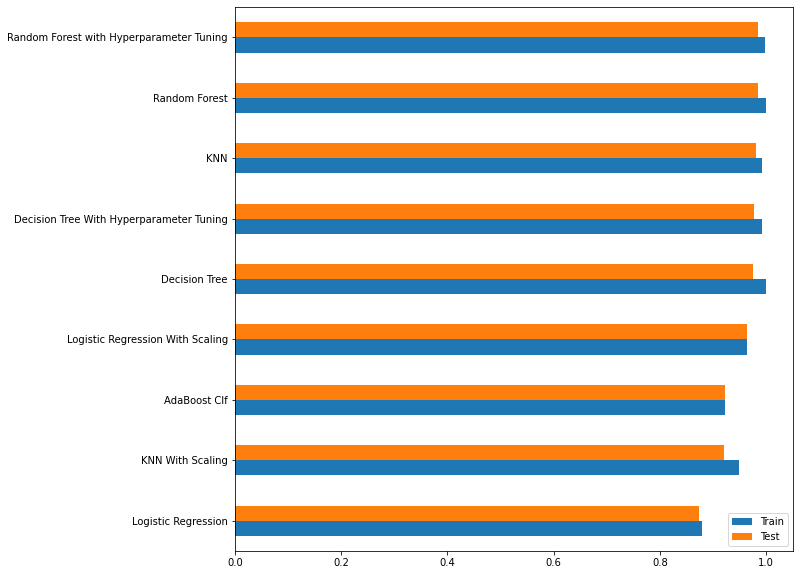

In [149]:
acc_df.sort_values('Test').plot(kind='barh',figsize=(10,10))

# So We Select The Random Forest 

In [150]:
import pickle
with open('customer_seg_model.pkl','wb')as f:
    pickle.dump(rf_hyp,f)

In [153]:
columns={"Columns":list(x.columns)}

In [154]:
import json
with open('customer_seg_data.json','w')as f:
    json.dump(columns,f)